In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from hmmlearn import hmm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [12]:
df = pd.read_csv('/Users/joaop.cardoso/MestradoCD/TMBD/TMBD_M02/METRO Interstate/Metro_Interstate_Traffic_Volume.csv')
print(df.describe())

               temp       rain_1h       snow_1h    clouds_all  traffic_volume
count  48204.000000  48204.000000  48204.000000  48204.000000    48204.000000
mean     281.205870      0.334264      0.000222     49.362231     3259.818355
std       13.338232     44.789133      0.008168     39.015750     1986.860670
min        0.000000      0.000000      0.000000      0.000000        0.000000
25%      272.160000      0.000000      0.000000      1.000000     1193.000000
50%      282.450000      0.000000      0.000000     64.000000     3380.000000
75%      291.806000      0.000000      0.000000     90.000000     4933.000000
max      310.070000   9831.300000      0.510000    100.000000     7280.000000


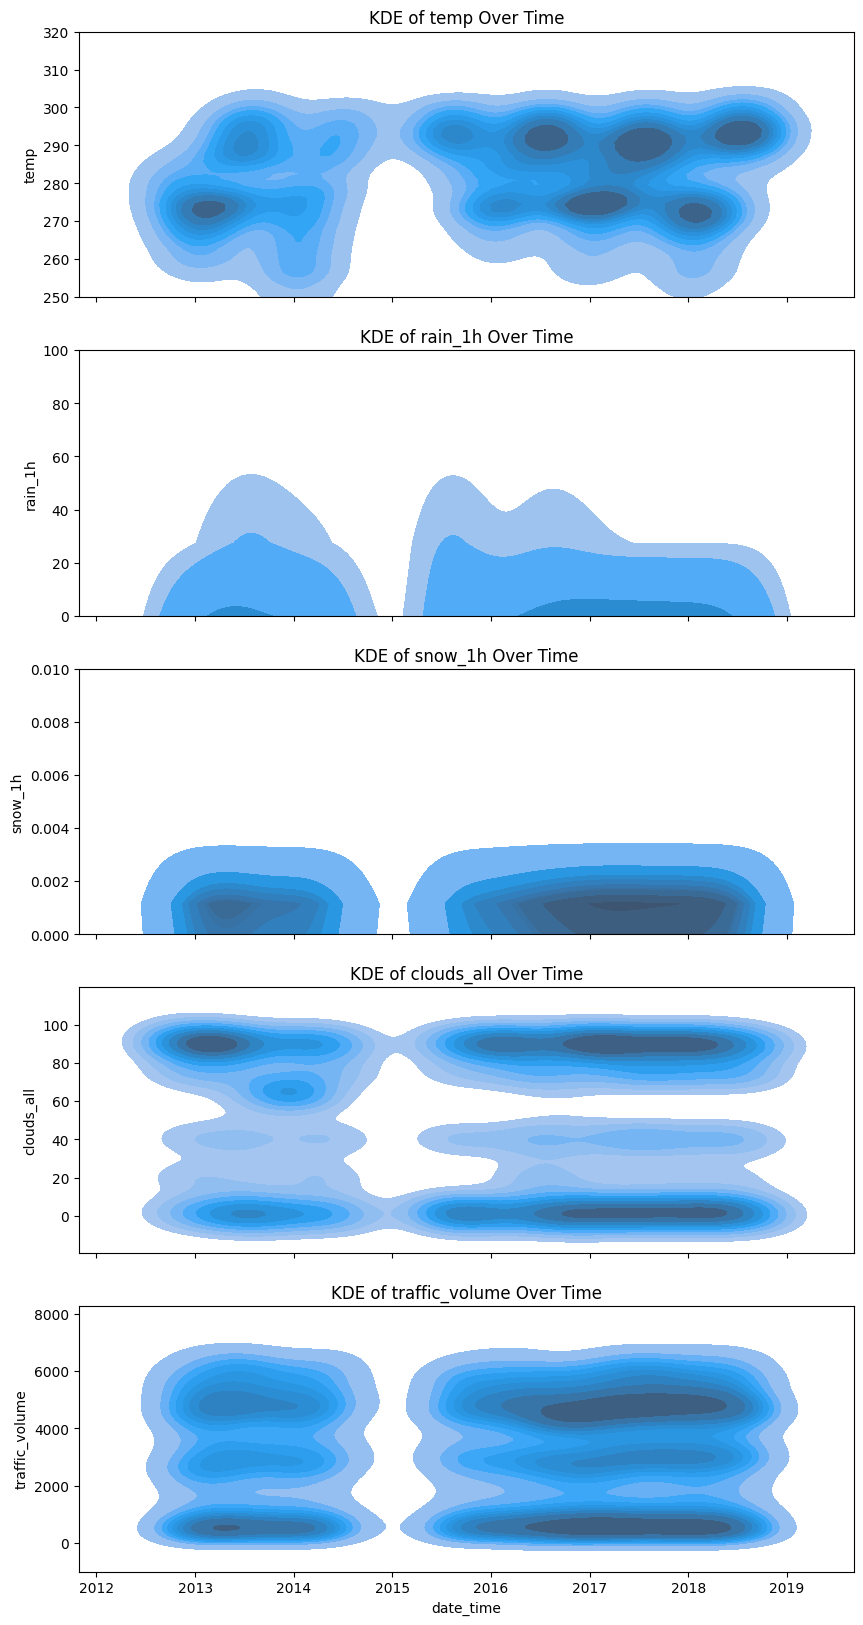

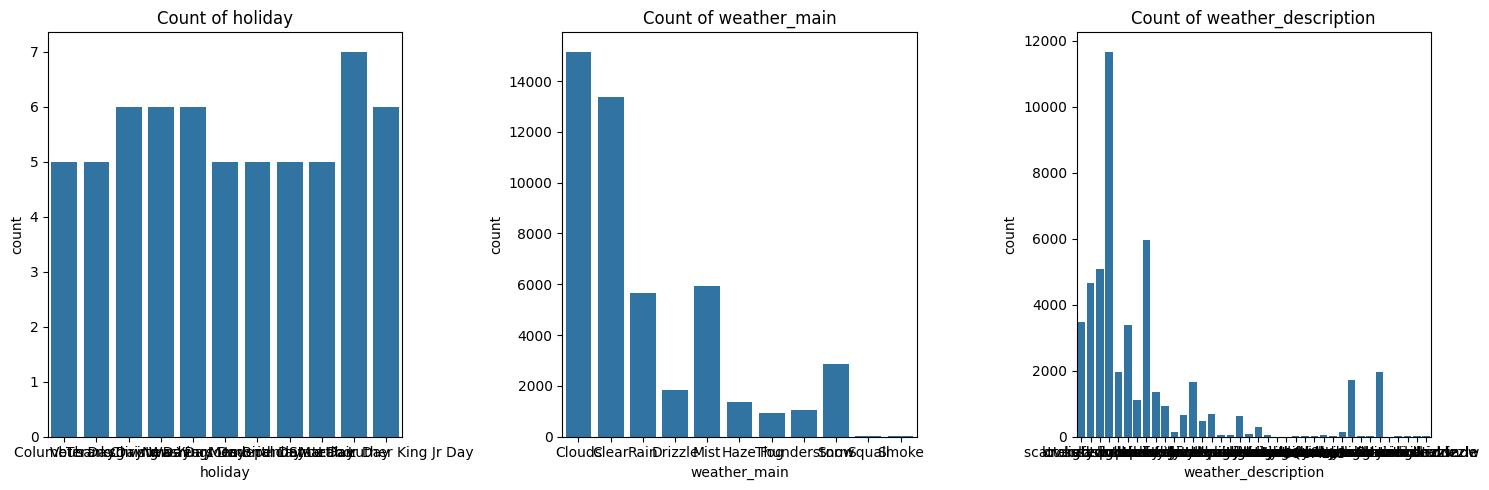

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example DataFrame structure for illustration (actual data is assumed to be in `df`)
# KDE plots for quantitative variables over time
quantitative_vars = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']

# Ensure date_time is in datetime format if not already
df['date_time'] = pd.to_datetime(df['date_time'])

# Set up KDE plots
fig, axes = plt.subplots(len(quantitative_vars), 1, figsize=(10, 20), sharex=True)
for i, var in enumerate(quantitative_vars):
    sns.kdeplot(x='date_time', y=var, data=df, ax=axes[i], fill=True)
    axes[i].set_title(f'KDE of {var} Over Time') # Automatically adjust y-axis to data without manually setting limits
    # Adjust y-axis limits for 'rain_1h' and 'snow_1h'
    if var in ['temp']:
        axes[i].set_ylim(250, 320)
    if var in ['rain_1h']:
        axes[i].set_ylim(0, 100)
    if var in ['snow_1h']:
        axes[i].set_ylim(0, 0.01)

# Bar plots for categorical variables
categorical_vars = ['holiday', 'weather_main', 'weather_description']
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(15, 5))

for i, var in enumerate(categorical_vars):
    sns.countplot(data=df, x=var, ax=axes[i])
    axes[i].set_title(f'Count of {var}')

plt.tight_layout()
plt.show()
